<a href="https://colab.research.google.com/github/Gojo-Satoru-git/GEN-AI/blob/main/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten, LeakyReLU, BatchNormalization
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
latent_dim = 100
batch_size = 128
epochs = 1000

In [ ]:
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5) / 127.5  # Normalize to [-1, 1]
x_train = np.expand_dims(x_train, axis=-1)


In [ ]:
def build_generator():
    model = Sequential([
        Dense(256, input_dim=latent_dim),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(512),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(1024),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(28*28, activation='tanh'),
        Reshape((28, 28, 1))
    ])
    return model

In [ ]:
def build_discriminator():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(512),
        LeakyReLU(alpha=0.2),
        Dense(256),
        LeakyReLU(alpha=0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

In [ ]:
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), metrics=['accuracy'])

In [ ]:
discriminator.trainable = False
z = tf.keras.Input(shape=(latent_dim,))
gen_img = generator(z)
validity = discriminator(gen_img)
combined = tf.keras.Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5))

In [ ]:
for epoch in range(epochs):
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_imgs = x_train[idx]
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    z = np.random.normal(0, 1, (batch_size, latent_dim))
    gen_imgs = generator.predict(z)

    d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    z = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = combined.train_on_batch(z, real_labels)

    print(f"Epoch {epoch+1}/{epochs} | D Loss: {d_loss[0]:.4f}, Acc: {100*d_loss[1]:.2f}% | G Loss: {g_loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Epoch 1/1000 | D Loss: 2.8205, Acc: 50.04% | G Loss: 0.0239
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Epoch 2/1000 | D Loss: 2.8220, Acc: 50.04% | G Loss: 0.0238
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Epoch 3/1000 | D Loss: 2.8234, Acc: 50.04% | G Loss: 0.0238
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Epoch 4/1000 | D Loss: 2.8249, Acc: 50.04% | G Loss: 0.0238
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Epoch 5/1000 | D Loss: 2.8263, Acc: 50.04% | G Loss: 0.0237
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Epoch 6/1000 | D Loss: 2.8278, Acc: 50.04% | G Loss: 0.0237
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Epoch 7/1000 | D Loss: 2.8293, Acc: 50.04% | G Loss: 0.0236
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Epoch 8/1000 | D Loss: 2.8309, Acc: 50.04% | G Loss: 0.0236
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Epoch 9/1000 | D Loss: 2.8323, Acc: 50.04% | G Loss: 0.0235
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Epoch 10/1000 | D Loss: 2.8338, Acc: 50.04% | G Loss: 0.0235
4/4 ━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


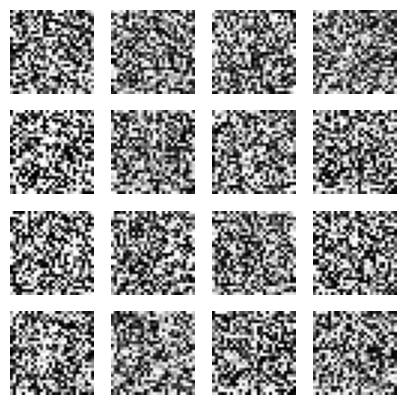

In [ ]:
def generate_and_show():
    z = np.random.normal(0, 1, (16, latent_dim))
    gen_imgs = generator.predict(z)
    fig, axes = plt.subplots(4, 4, figsize=(5, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(gen_imgs[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
    plt.show()

generate_and_show()